# The Team

### Capstone Team 5

<ul>
<li>Abhijit.</li>
<li>Biswa</li>
<li>Chirag</li>
<li>Dalon</li>
<li>Sunil</li>
</ul>

### Mentor
<ul>
<li>Siva</li>
<li> Dr Narayana</li>
</ul>

### Agenda
<ul>
<li>The Challenge</li>
<li>EDA</li>
<li>Learning</li>
<li>Model</li>
<li>Final Score</li>
</ul>

In [1]:
import os
print(os.listdir("/home/l/data"))

['xgboost_trainsamplediffparams.pkl', 'xgboost_4c_withmerge.pkl', 'mnt', 'sample_submission.csv.zip', 'clickfarm1.jpg', 'test_supplement.csv.zip', 'nohup.out', '.ipynb_checkpoints', 'submission.csv', 'EDAReport.ipynb', 'train_sample.csv.zip', 'xgboost_4c_withmergediffparams.pkl', 'BuildModel_merge_diffparams.ipynb', 'Dalon_notebook.ipynb', 'submission_4c_withmany.csv', 'test_withmerge.csv', 'xgbts_merge_withdiffparams.csv', 'PlotImportance_withmerge.ipynb', 'xgboost_8c.pkl', 'Untitled.ipynb', 'sample_submission.csv', 'BuildModel_merge_8c.ipynb', 'clickfarm.jpg', 'xgboost_4c_withmany.pkl', 'test.csv', 'train.csv.zip', 'test.csv.zip', 'BuildModel.ipynb', 'submission_4c_withmerge.csv', 'xgb_merge_withdiffparams.csv']


In [2]:
import pandas as pd
import numpy as np

In [96]:
usefulcolumns=['ip','app','device','os', 'channel', 'click_time', 'is_attributed']
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        }

## Reading Data

The original Data set had these columns 

    ip: ip address of click.
    app: app id for marketing.
    device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
    os: os version id of user mobile phone
    channel: channel id of mobile ad publisher
    click_time: timestamp of click (UTC)
    attributed_time: if user download the app for after clicking an ad, this is the time of the app download
    is_attributed: the target that is to be predicted, indicating the app was downloaded

The attributed time as understood by the train sample has a lot empty data . We are not reading this as part of our EDA analysis .However The EDA on train sample we had included the attributed time .

There is also memory optimization done as part of the dataframe like giving data types for each of the numerical column.

This helped use to load the entire dataset in less RAM environment

In [4]:
traindata= pd.read_csv('mnt/ssd/kaggle-talkingdata2/competition_files/train.csv',parse_dates=['click_time'],dtype=dtypes,usecols=usefulcolumns)

### Shape and features of the data

In [5]:
traindata.shape

(184903890, 7)

In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 7 columns):
ip               uint32
app              uint16
device           uint16
os               uint16
channel          uint16
click_time       datetime64[ns]
is_attributed    uint8
dtypes: datetime64[ns](1), uint16(4), uint32(1), uint8(1)
memory usage: 3.6 GB


### Missing Value

The data set doesn't have any missing value .Attributed time had missing values .This column was n't considered for model building /EDA

In [7]:
traindata.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

### Class Imbalance

In [8]:
classimbalance=traindata.is_attributed.value_counts(normalize=True)

In [9]:
import matplotlib


In [10]:
matplotlib.use('Agg')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Highly imbalanced dataset 
only a very little proportion of clicks generate downloads.

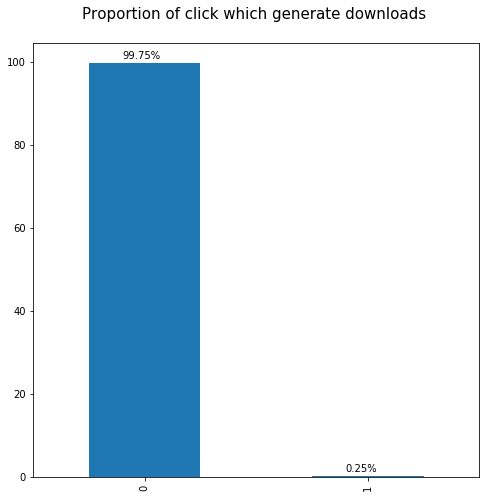

In [12]:
plt.figure(figsize=(8,8))
plt.title('Proportion of click which generate downloads \n', fontsize =15)
ax =(classimbalance*100).plot(kind='bar')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [13]:
import seaborn as sns

#### Unique Values acrosss ip/app/os/device/channel
Obviously the IP seems to have lot of unique values

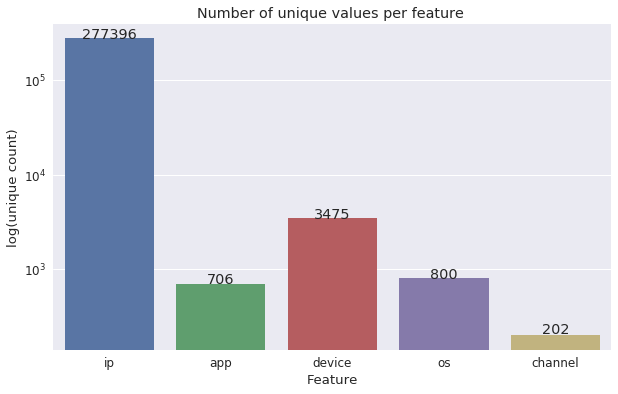

In [14]:


plt.figure(figsize=(10, 6))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(traindata[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature ')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

### Suspicious IP
Most of the IP have generate only few clicks, but few IP generated a ton of clicks

Text(0.5,1,'Number of click by IP')

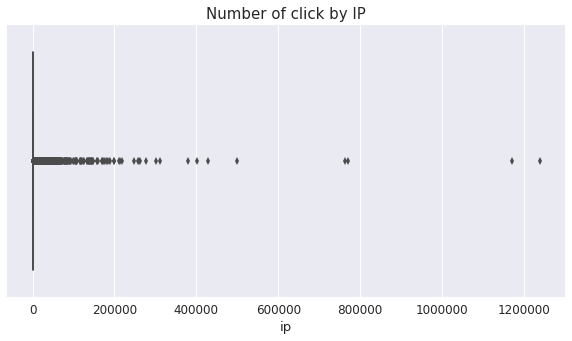

In [17]:

IP = traindata['ip'].value_counts()

# We can now take a first look at those IP
plt.figure(figsize = [10,5])
sns.boxplot(IP)
plt.title('Number of click by IP', fontsize =15)

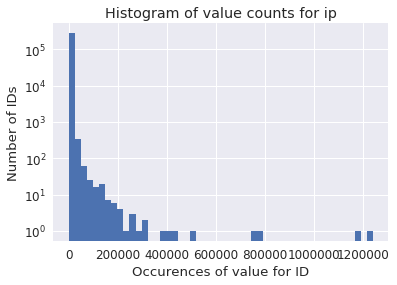

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(IP, bins=50)
ax.set_yscale('log', nonposy='clip')
plt.title("Histogram of value counts for {}".format('ip'))
plt.ylabel('Number of IDs')
plt.xlabel('Occurences of value for IP')
plt.show()

Text(0.5,1,'Number of click by APP')

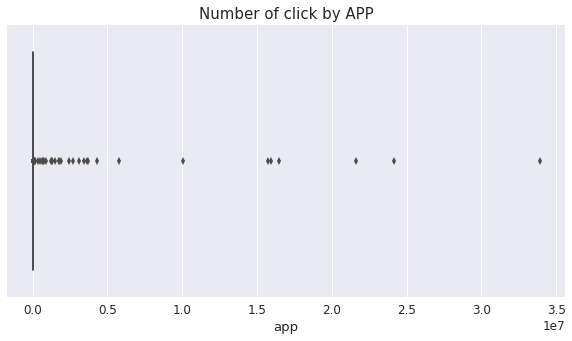

In [29]:

app = traindata['app'].value_counts()

# We can now take a first look at those IP
plt.figure(figsize = [10,5])
sns.boxplot(app)
plt.title('Number of click by APP', fontsize =15)

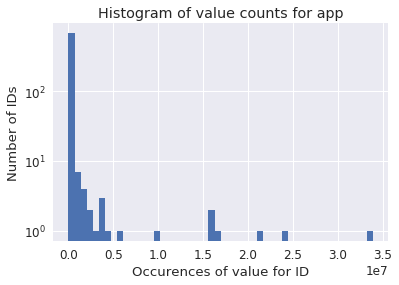

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(app, bins=50)
ax.set_yscale('log', nonposy='clip')
plt.title("Histogram of value counts for {}".format('app'))
plt.ylabel('Number of IDs')
plt.xlabel('Occurences of value for ID')
plt.show()

Text(0.5,1,'Number of click by OS')

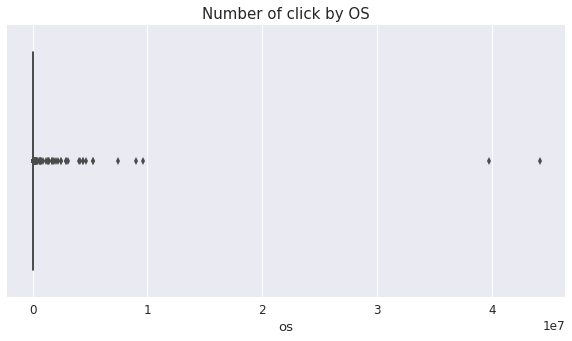

In [34]:
os = traindata['os'].value_counts()

# We can now take a first look at those IP
plt.figure(figsize = [10,5])
sns.boxplot(os)
plt.title('Number of click by OS', fontsize =15)

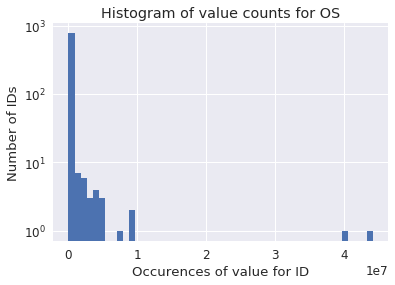

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(os, bins=50)
ax.set_yscale('log', nonposy='clip')
plt.title("Histogram of value counts for {}".format('OS'))
plt.ylabel('Number of IDs')
plt.xlabel('Occurences of value for ID')
plt.show()

Text(0.5,1,'Number of click by Device')

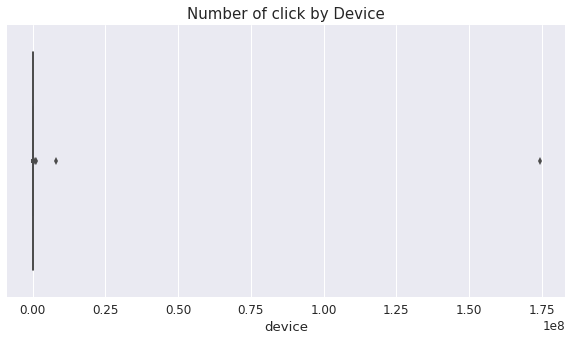

In [36]:
device = traindata['device'].value_counts()

# We can now take a first look at those IP
plt.figure(figsize = [10,5])
sns.boxplot(device)
plt.title('Number of click by Device', fontsize =15)

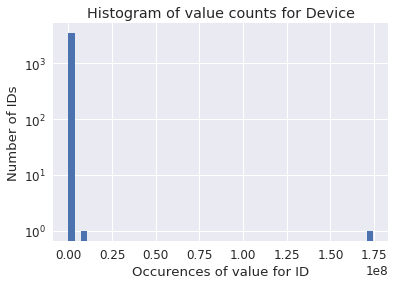

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(device, bins=50)
ax.set_yscale('log', nonposy='clip')
plt.title("Histogram of value counts for {}".format('Device'))
plt.ylabel('Number of IDs')
plt.xlabel('Occurences of value for ID')
plt.show()

Text(0.5,1,'Number of click by Device')

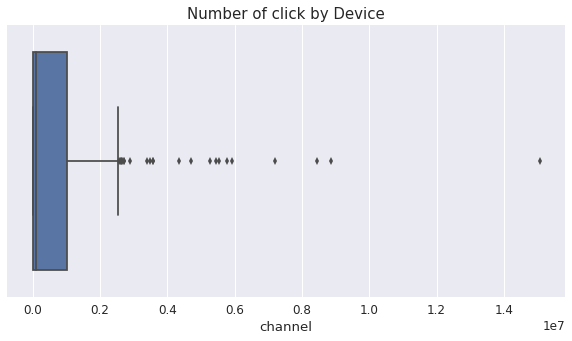

In [39]:
channel = traindata['channel'].value_counts()

# We can now take a first look at those IP
plt.figure(figsize = [10,5])
sns.boxplot(channel)
plt.title('Number of click by Device', fontsize =15)

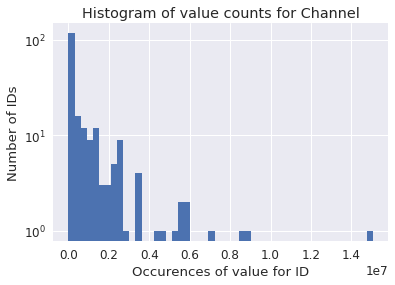

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(channel, bins=50)
ax.set_yscale('log', nonposy='clip')
plt.title("Histogram of value counts for {}".format('Channel'))
plt.ylabel('Number of IDs')
plt.xlabel('Occurences of value for ID')
plt.show()

In [19]:
IP.describe()

count    2.773960e+05
mean     6.665701e+02
std      5.446831e+03
min      1.000000e+00
25%      3.000000e+00
50%      1.300000e+01
75%      1.490000e+02
max      1.238734e+06
Name: ip, dtype: float64

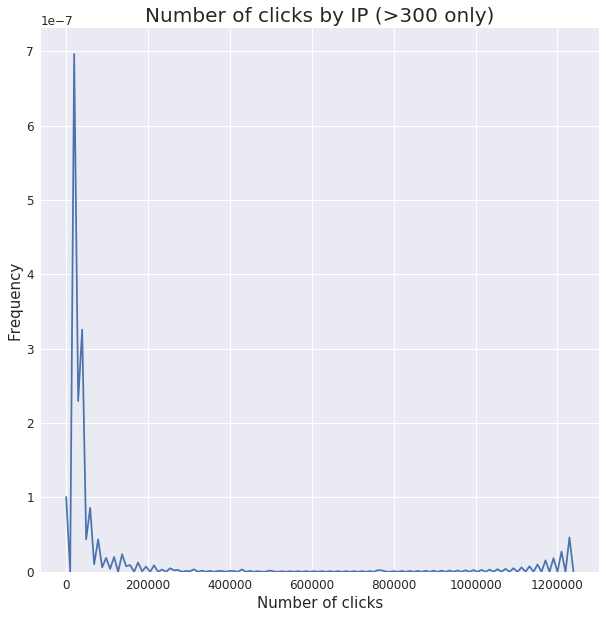

In [43]:
suspicious_IP = IP[IP > 300]
plt.figure(figsize=(10,10))
sns.distplot(suspicious_IP, hist = False)
plt.title('Number of clicks by IP (>300 only)', fontsize = 20)
plt.xlabel('Number of clicks', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# Cleaning
del suspicious_IP


Text(0,0.5,'Frequency')

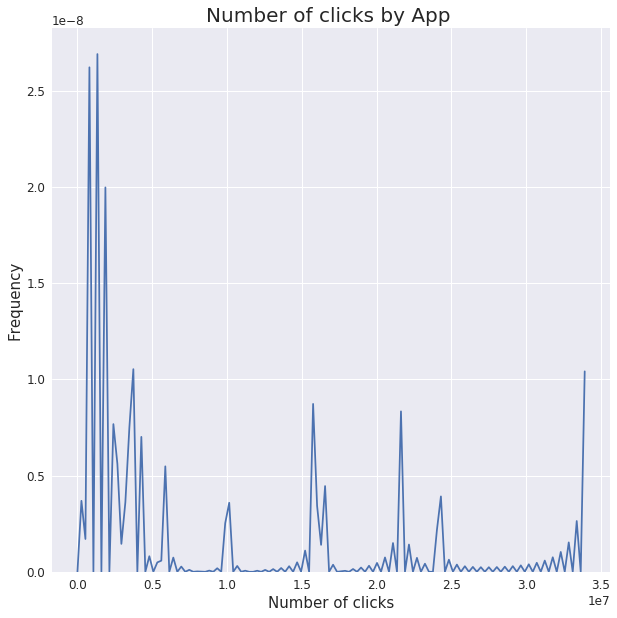

In [97]:

plt.figure(figsize=(10,10))
sns.distplot(app, hist = False)
plt.title('Number of clicks by App ', fontsize = 20)
plt.xlabel('Number of clicks', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)



Text(0,0.5,'Frequency')

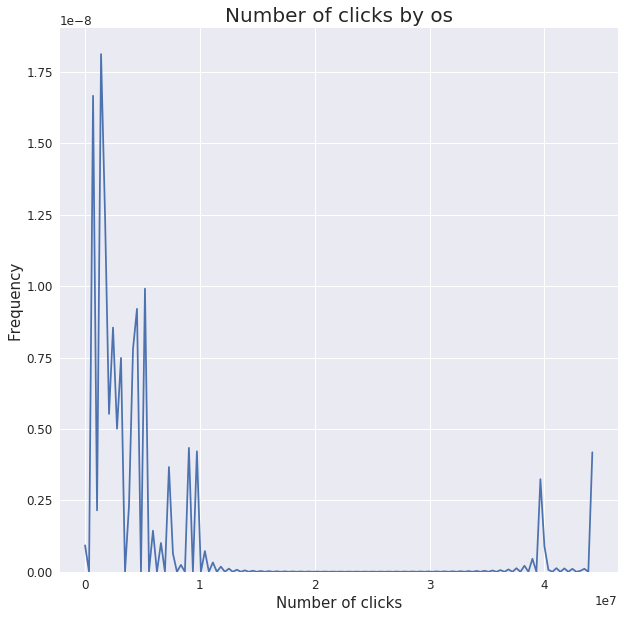

In [98]:

plt.figure(figsize=(10,10))
sns.distplot(os, hist = False)
plt.title('Number of clicks by os', fontsize = 20)
plt.xlabel('Number of clicks', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)



Text(0,0.5,'Frequency')

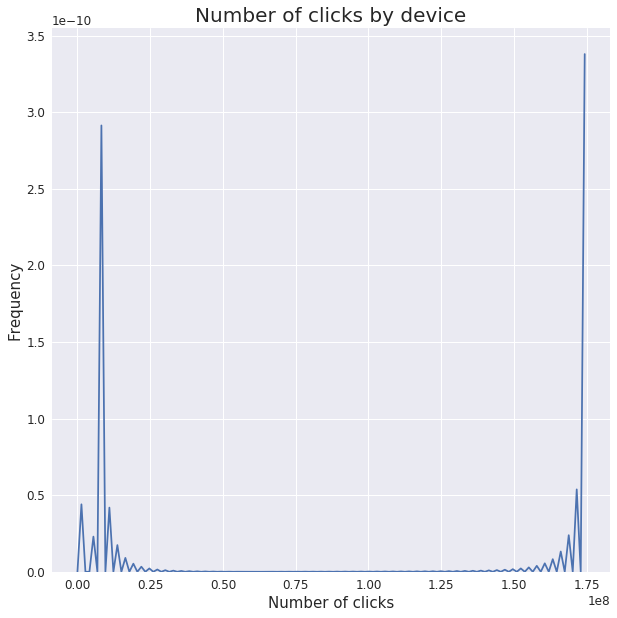

In [46]:

plt.figure(figsize=(10,10))
sns.distplot(device, hist = False)
plt.title('Number of clicks by device', fontsize = 20)
plt.xlabel('Number of clicks', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


Text(0,0.5,'Frequency')

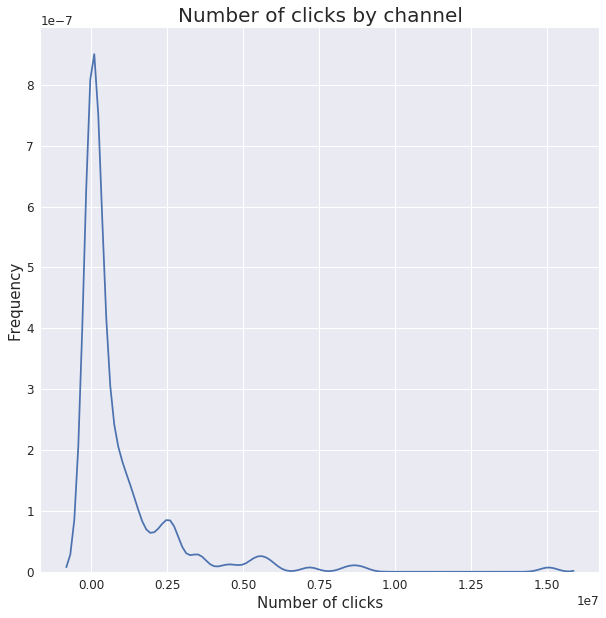

In [47]:
plt.figure(figsize=(10,10))
sns.distplot(channel, hist = False)
plt.title('Number of clicks by channel', fontsize = 20)
plt.xlabel('Number of clicks', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

In [48]:
import gc

In [49]:


IP_ready_to_merge = pd.DataFrame(IP).reset_index()
IP_ready_to_merge.columns=['ip', 'freq_ip']

# Cleaning
del IP
gc.collect()

# Creation of clicker categories (we will use it later)
IP_ready_to_merge['clicker_type'] = ''
IP_ready_to_merge.loc[IP_ready_to_merge['freq_ip'] <= 100, 'clicker_type'] = 'Low'
IP_ready_to_merge.loc[(IP_ready_to_merge['freq_ip'] >= 100) & (IP_ready_to_merge['freq_ip'] < 3000), 'clicker_type'] = 'Medium'
IP_ready_to_merge.loc[IP_ready_to_merge['freq_ip'] >= 3000, 'clicker_type'] = 'High'

# Now we can add our IP frequency to our main dataframe




In [50]:
traindata = pd.merge(traindata, IP_ready_to_merge, on ='ip')

In [51]:
traindata.head()

,ip,app,device,os,channel,click_time,is_attributed,freq_ip,clicker_type
0,83230,3,1,13,379,2017-11-06 14:32:21,0,25719,High
1,83230,2,1,3,477,2017-11-06 16:00:31,0,25719,High
2,83230,12,1,13,178,2017-11-06 16:00:48,0,25719,High
3,83230,9,1,13,134,2017-11-06 16:00:50,0,25719,High
4,83230,2,1,19,237,2017-11-06 16:00:56,0,25719,High


In [52]:
print("How many IP do we have in each category ?\n", IP_ready_to_merge['clicker_type'].value_counts())
print("How many clicks, clickers of each caterogy have generate ?\n",traindata['clicker_type'].value_counts())

How many IP do we have in each category ?
 Low       200793
Medium     61580
High       15023
Name: clicker_type, dtype: int64
How many clicks, clickers of each caterogy have generate ?
 High      131149399
Medium     50874177
Low         2880314
Name: clicker_type, dtype: int64


### From Count of IP's
 Only a small number of IP's from the High count contribute to the hughe number of clicks
 There are more number of IP's in Low category but their contribution to number of clicks is less compared to other categories

Text(0,0.5,'')

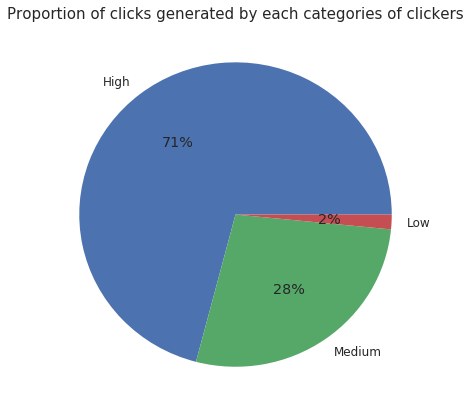

In [53]:
plt.figure(figsize = (7,7))
traindata['clicker_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title("Proportion of clicks generated by each categories of clickers", fontsize =15)
plt.ylabel("")

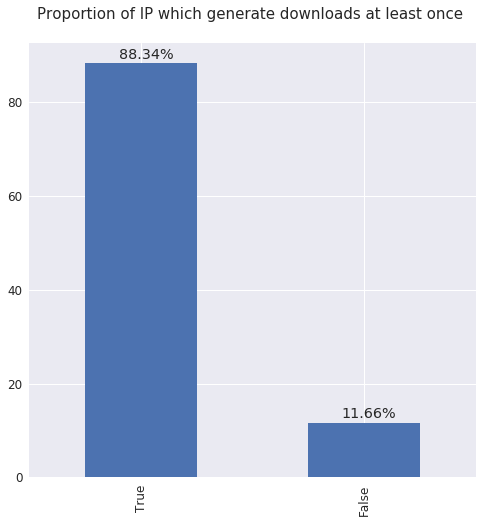

In [54]:
DL_by_IP = traindata.groupby('ip').is_attributed.sum()

plt.figure(figsize=(8,8))
plt.title('Proportion of IP which generate downloads at least once \n', fontsize =15)
ax =((DL_by_IP > 0).value_counts(normalize=True)*100).plot(kind='bar')

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

#### Shows Majority of ip's download atleast once Are they the bots ?

5972

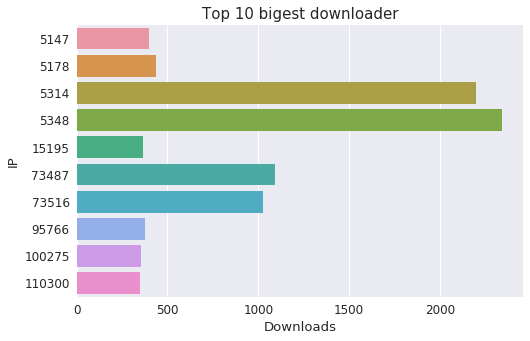

In [55]:
data_to_plot = DL_by_IP.nlargest(10).reset_index()
data_to_plot.columns=('IP', 'Downloads')
data_to_plot.sort_values('Downloads', ascending = False)
plt.figure(figsize = (8,5))
sns.barplot(x = data_to_plot['Downloads'], y = data_to_plot['IP'], orient = 'h')
plt.title('Top 10 bigest downloader', fontsize = 15)

# Cleaning
del data_to_plot
gc.collect()

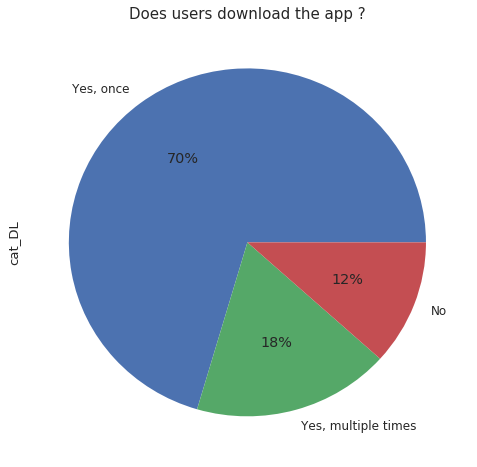

In [56]:
data_to_plot2 = pd.DataFrame(DL_by_IP).reset_index()

# We create some categories to plot
data_to_plot2["cat_DL"] = ''
data_to_plot2.loc[data_to_plot2['is_attributed'] == 0, "cat_DL"] = "No"
data_to_plot2.loc[data_to_plot2['is_attributed'] == 1, "cat_DL"] = "Yes, once"
data_to_plot2.loc[data_to_plot2['is_attributed'] > 1, "cat_DL"] = "Yes, multiple times"

# We can plot it
plt.figure(figsize=(8,8))
data_to_plot2["cat_DL"].value_counts().plot(kind = 'pie',autopct='%1.0f%%')
plt.title('Does users download the app ?', fontsize=15)
plt.ytitle=''

4946

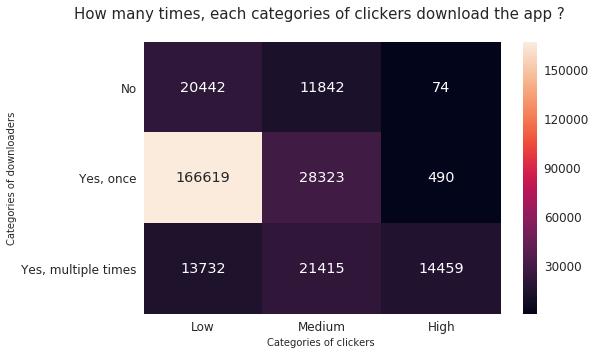

In [57]:


ip_level = pd.merge(IP_ready_to_merge, data_to_plot2, on='ip')
cross_tab = pd.crosstab(ip_level['cat_DL'], ip_level['clicker_type'])

# We need to sort the index (because 'Yes, one time' was beofre 'Yes, multiple times')
cross_tab.index = pd.CategoricalIndex(cross_tab.index, categories = ['Yes, multiple times', 'Yes, once', 'No'])
cross_tab = cross_tab.sort_index(ascending = False)

# Same thing for columns
cross_tab = cross_tab[['Low', 'Medium', 'High']]

# Ok we can make our graph now
plt.figure(figsize = (8,5))
plt.title('How many times, each categories of clickers download the app ? \n', fontsize=15) 
sns.heatmap(cross_tab,annot=True, fmt='')
plt.xlabel('Categories of clickers ', fontsize = 10)
plt.ylabel('Categories of downloaders', fontsize = 10)

# Some cleaning
#del IP_ready_to_merge, data_to_plot2
gc.collect()



### Seems to suggest low count there is more chance of download so count could be a good feature

2389

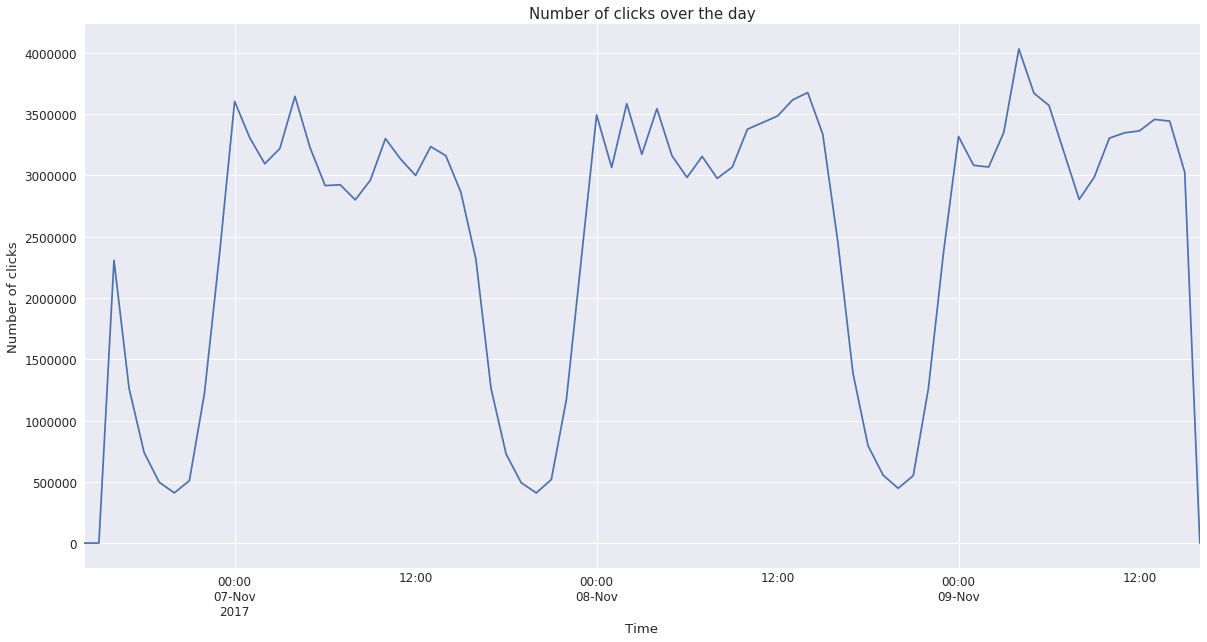

In [65]:
traindata.set_index(pd.to_datetime(traindata['click_time']), inplace = True)
by_hour = traindata.resample('H').ip.count()

plt.figure(figsize = (20,10))
by_hour.plot()
plt.title('Number of clicks over the day', fontsize = 15)
plt.xlabel('Time')
plt.ylabel('Number of clicks')

# Cleaning
del by_hour
gc.collect()

In [66]:
traindata.head(10)

,ip,app,device,os,channel,click_time,is_attributed,freq_ip,clicker_type
click_time,,,,,,,,,
2017-11-06 14:32:21,83230,3,1,13,379,2017-11-06 14:32:21,0,25719,High
2017-11-06 16:00:31,83230,2,1,3,477,2017-11-06 16:00:31,0,25719,High
2017-11-06 16:00:48,83230,12,1,13,178,2017-11-06 16:00:48,0,25719,High
2017-11-06 16:00:50,83230,9,1,13,134,2017-11-06 16:00:50,0,25719,High
2017-11-06 16:00:56,83230,2,1,19,237,2017-11-06 16:00:56,0,25719,High
2017-11-06 16:00:57,83230,15,1,13,245,2017-11-06 16:00:57,0,25719,High
2017-11-06 16:01:01,83230,6,1,13,125,2017-11-06 16:01:01,0,25719,High
2017-11-06 16:01:20,83230,2,1,13,258,2017-11-06 16:01:20,0,25719,High
2017-11-06 16:01:21,83230,3,1,13,135,2017-11-06 16:01:21,0,25719,High


#### The data starts from 06th November 4pm 

In [67]:
traindata.tail(10)

,ip,app,device,os,channel,click_time,is_attributed,freq_ip,clicker_type
click_time,,,,,,,,,
2017-11-09 15:58:39,337511,45,1,32,419,2017-11-09 15:58:39,1,1,Low
2017-11-09 15:58:41,323422,19,21,24,213,2017-11-09 15:58:41,0,2,Low
2017-11-09 15:58:49,323422,19,21,24,213,2017-11-09 15:58:49,1,2,Low
2017-11-09 15:58:42,344899,29,1,10,213,2017-11-09 15:58:42,1,1,Low
2017-11-09 15:58:43,289406,19,0,0,213,2017-11-09 15:58:43,1,1,Low
2017-11-09 15:58:57,324258,19,0,0,213,2017-11-09 15:58:57,1,1,Low
2017-11-09 15:59:03,291188,10,1,61,113,2017-11-09 15:59:03,1,1,Low
2017-11-09 15:59:07,324883,45,1,58,419,2017-11-09 15:59:07,1,1,Low
2017-11-09 15:59:08,338843,5,1,37,113,2017-11-09 15:59:08,1,1,Low


#### The data ends on 9th November approx 4 PM

Text(0,0.5,'Download rate')

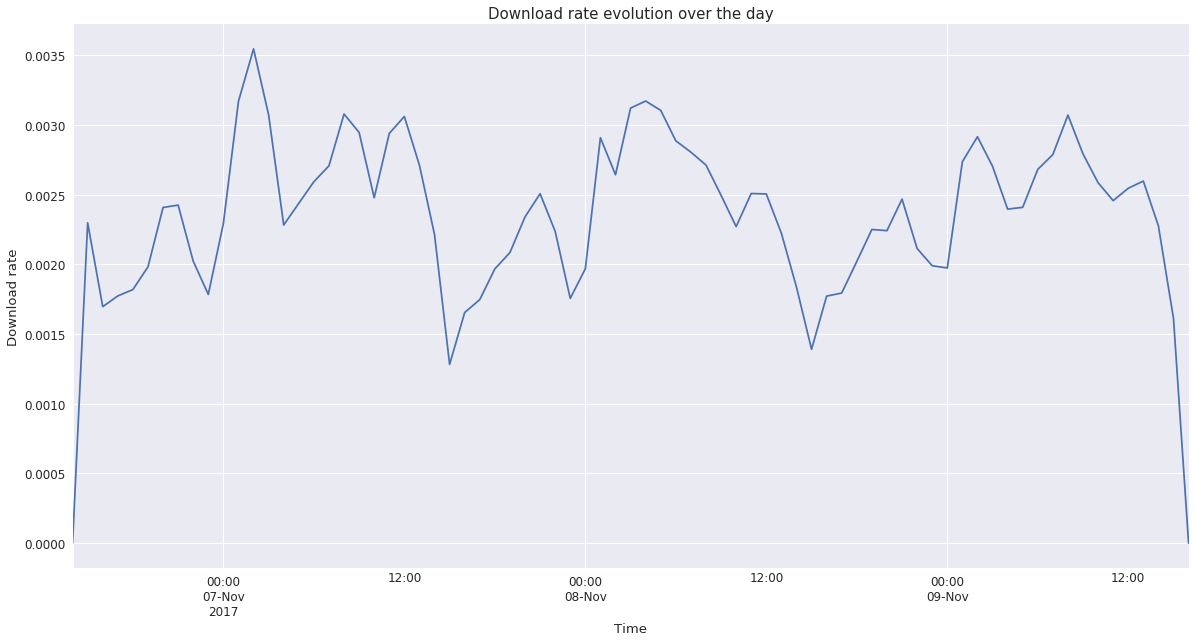

In [68]:
plt.figure(figsize = (20,10))
traindata.resample('H').is_attributed.mean().plot()
plt.title('Download rate evolution over the day', fontsize = 15)
plt.xlabel('Time')
plt.ylabel('Download rate')

#### The download rate seems to be higher around midnight

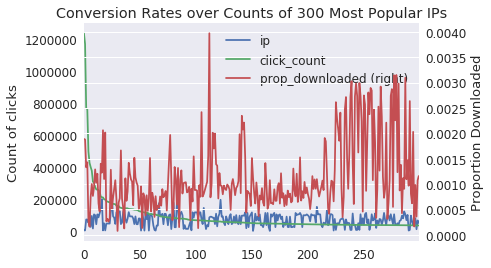

Counversion Rates over Counts of Most Popular IPs
        ip  click_count  prop_downloaded
0     5348      1238734         0.001889
1     5314      1171448         0.001878
2    73516       770451         0.001330
3    73487       763854         0.001428
4    53454       498186         0.000275
5   114276       427453         0.000159
6    26995       401495         0.000747
7    95766       378693         0.001001
8    17149       310996         0.000765
9   105475       302192         0.000943
10  100275       276799         0.001290
11   43793       261970         0.001027
12  105560       260049         0.001204
13   86767       257649         0.000617
14  111025       247187         0.000461
15  137052       217614         0.001402
16  201182       212448         0.001224
17    5178       211556         0.002061
18   49602       200053         0.001100
19    5147       197994         0.002015


In [16]:
proportion = traindata[['ip', 'is_attributed']].groupby('ip', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = traindata[['ip', 'is_attributed']].groupby('ip', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='ip', how='left')
merge.columns = ['ip', 'click_count', 'prop_downloaded']
#merge = merge[['click_count','prop_downloaded'],]
ax = merge[:300].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 300 Most Popular IPs')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular IPs')
print(merge[:20])

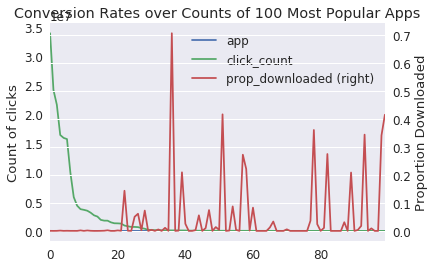

Counversion Rates over Counts of Most Popular Apps
    app  click_count  prop_downloaded
0     3     33911780         0.000303
1    12     24179003         0.000109
2     2     21642136         0.000262
3     9     16458268         0.001144
4    15     15958970         0.000214
5    18     15756587         0.000503
6    14     10027169         0.000250
7     1      5796274         0.000212
8    13      4329409         0.000167
9     8      3731948         0.001842
10   21      3616407         0.000133
11   11      3466971         0.001555
12   26      3126136         0.000467
13   23      2675259         0.000019
14    6      2464136         0.000083
15   64      1893969         0.000266
16    7      1764954         0.000670
17   20      1758934         0.002176
18   25      1467907         0.000047
19   28      1311496         0.000082


In [74]:
proportion = traindata[['app', 'is_attributed']].groupby('app', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = traindata[['app', 'is_attributed']].groupby('app', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='app', how='left')
merge.columns = ['app', 'click_count', 'prop_downloaded']

ax = merge[:100].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular Apps')
print(merge[:20])

In [69]:
testdata= pd.read_csv('test.csv',parse_dates=['click_time'],dtype=dtypes)

In [70]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 7 columns):
click_id      int64
ip            uint32
app           uint16
device        uint16
os            uint16
channel       uint16
click_time    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), uint16(4), uint32(1)
memory usage: 501.8 MB


2690

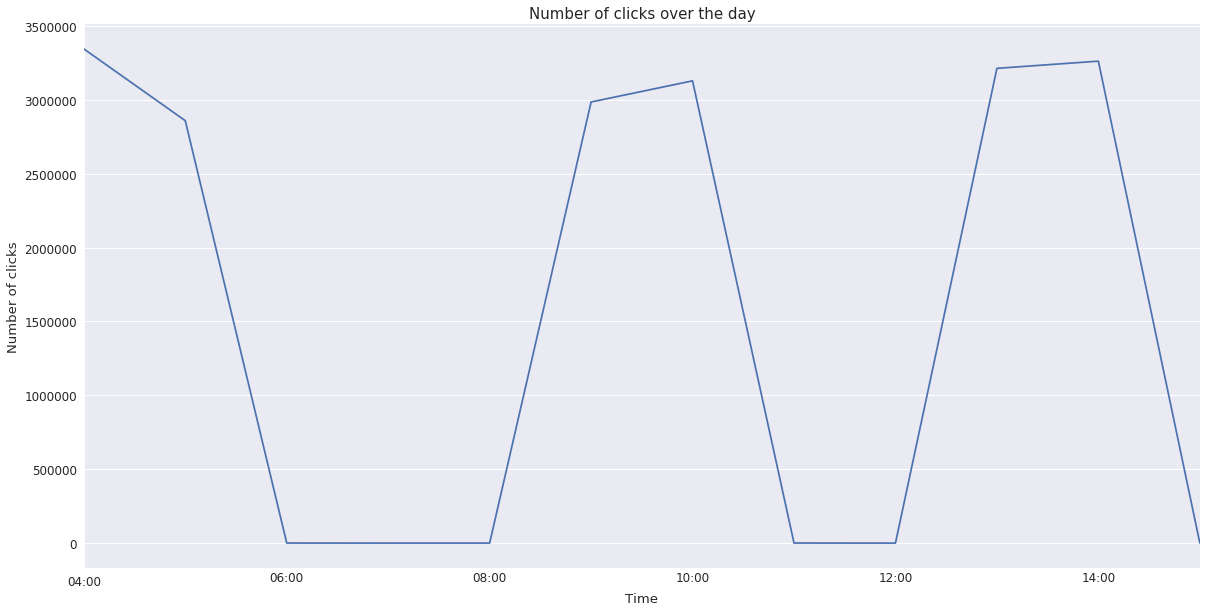

In [71]:
testdata.set_index(pd.to_datetime(testdata['click_time']), inplace = True)
by_hourtest = testdata.resample('H').ip.count()

plt.figure(figsize = (20,10))
by_hourtest.plot()
plt.title('Number of clicks over the day', fontsize = 15)
plt.xlabel('Time')
plt.ylabel('Number of clicks')

# Cleaning
del by_hourtest
gc.collect()

In [72]:
testdata.head(10)

,click_id,ip,app,device,os,channel,click_time
click_time,,,,,,,
2017-11-10 04:00:00,0,5744,9,1,3,107,2017-11-10 04:00:00
2017-11-10 04:00:00,1,119901,9,1,3,466,2017-11-10 04:00:00
2017-11-10 04:00:00,2,72287,21,1,19,128,2017-11-10 04:00:00
2017-11-10 04:00:00,3,78477,15,1,13,111,2017-11-10 04:00:00
2017-11-10 04:00:00,4,123080,12,1,13,328,2017-11-10 04:00:00
2017-11-10 04:00:00,5,110769,18,1,13,107,2017-11-10 04:00:00
2017-11-10 04:00:00,6,12540,3,1,1,137,2017-11-10 04:00:00
2017-11-10 04:00:00,7,88637,27,1,19,153,2017-11-10 04:00:00
2017-11-10 04:00:00,9,14932,18,1,10,107,2017-11-10 04:00:00


#### The testdata is for 10th November and it starts 4 am

In [73]:
testdata.tail(10)

,click_id,ip,app,device,os,channel,click_time
click_time,,,,,,,
2017-11-10 15:00:00,18790459,102467,15,1,17,140,2017-11-10 15:00:00
2017-11-10 15:00:00,18790460,80537,9,1,19,445,2017-11-10 15:00:00
2017-11-10 15:00:00,18790462,101214,2,2,16,237,2017-11-10 15:00:00
2017-11-10 15:00:00,18790461,113418,17,1,17,128,2017-11-10 15:00:00
2017-11-10 15:00:00,18790463,69245,12,1,13,135,2017-11-10 15:00:00
2017-11-10 15:00:00,18790464,99442,9,1,13,127,2017-11-10 15:00:00
2017-11-10 15:00:00,18790465,88046,23,1,37,153,2017-11-10 15:00:00
2017-11-10 15:00:00,18790467,81398,18,1,17,265,2017-11-10 15:00:00
2017-11-10 15:00:00,18790466,123236,27,1,13,122,2017-11-10 15:00:00


#### The testdata is for 10th November and it ends at 3 pm

In [60]:
#df_ip=pd.DataFrame(traindata.ip)


In [61]:
type(df_ip)

pandas.core.frame.DataFrame

In [64]:
#df_all = ip_level.merge(testdata.drop_duplicates(), on=['ip'], 
#                   how='left', indicator=True)

In [65]:
#df_all._merge.value_counts()

both          17263366
left_only       239232
right_only           0
dtype: int64

## The ips' are present in test and train , we decided to merge the train and test dataset to create features .And also the test dataset is for a different date and time 

In [75]:
traindata['click_hour']=traindata['click_time'].dt.hour

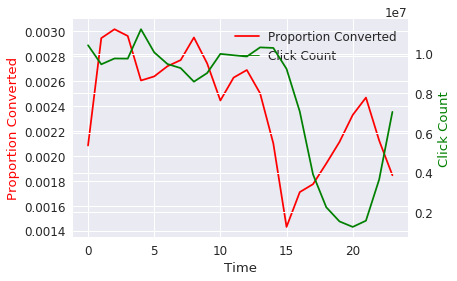

In [81]:

#adapted from https://stackoverflow.com/questions/9103166/multiple-axis-in-matplotlib-with-different-scales
#smonek's answer


group = traindata[['click_hour','is_attributed']].groupby(['click_hour'], as_index=False).mean()
x = group['click_hour']
ymean = group['is_attributed']
group = traindata[['click_hour','is_attributed']].groupby(['click_hour'], as_index=False).count()
ycount = group['is_attributed']


fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Proportion Converted")
par1.set_ylabel("Click Count")

color1 = 'red'
color2 = 'green'
p1, = host.plot(x, ymean, color=color1,label="Proportion Converted")
p2, = par1.plot(x, ycount, color=color2, label="Click Count")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

#The proportions may be more reliable if estimated on full data. With the random sample it's hard too tell because the variability is too high, especially for the hours with low click counts. i.e. the fewer clicks/conversions, the wider margin of the estimated conversion ratio. (see below)


In [82]:
attrb_traindata= pd.read_csv('mnt/ssd/kaggle-talkingdata2/competition_files/train.csv',parse_dates=['click_time','attributed_time'],dtype=dtypes)

In [83]:
attrb_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
ip                 uint32
app                uint16
device             uint16
os                 uint16
channel            uint16
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed      uint8
dtypes: datetime64[ns](2), uint16(4), uint32(1), uint8(1)
memory usage: 5.0 GB


In [89]:
timeDiffList= list()
i= 0;
def timeBtwDwnld(df):
    for i in range(0, len(df)):
        timeDiffList.append((df.iloc[i]['attributed_time']-df.iloc[i]['click_time']).seconds)
    return timeDiffList

In [91]:
AttributedDF= attrb_traindata[attrb_traindata.is_attributed==1]

In [92]:
AttributedDF['timePass']= timeBtwDwnld(AttributedDF)
AttributedDF['timePass'].describe()

/home/sunilvikram/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count    456846.000000
mean       5249.141133
std       10711.583899
min           0.000000
25%          55.000000
50%         293.000000
75%        4785.000000
max       86110.000000
Name: timePass, dtype: float64

#### The download seems immediate which is tough to imagine

Also the maximum is 86110 seconds which is approx 1 day later there was a download 

(array([  3.18297000e+05,   3.33420000e+04,   2.08730000e+04,
          1.50440000e+04,   1.14060000e+04,   9.37400000e+03,
          7.87700000e+03,   6.53200000e+03,   5.87900000e+03,
          4.89800000e+03,   4.09300000e+03,   3.46800000e+03,
          2.95800000e+03,   2.44800000e+03,   2.09500000e+03,
          1.61600000e+03,   1.35400000e+03,   1.09400000e+03,
          8.71000000e+02,   6.69000000e+02,   4.84000000e+02,
          3.82000000e+02,   3.16000000e+02,   3.24000000e+02,
          2.89000000e+02,   2.77000000e+02,   2.30000000e+02,
          1.88000000e+02,   1.25000000e+02,   4.30000000e+01]),
 array([     0.        ,   2870.33333333,   5740.66666667,   8611.        ,
         11481.33333333,  14351.66666667,  17222.        ,  20092.33333333,
         22962.66666667,  25833.        ,  28703.33333333,  31573.66666667,
         34444.        ,  37314.33333333,  40184.66666667,  43055.        ,
         45925.33333333,  48795.66666667,  51666.        ,  54536.33333333

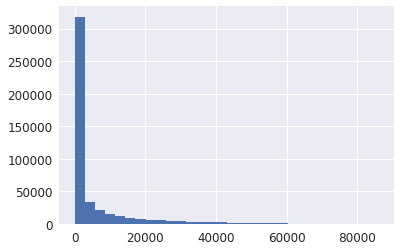

In [95]:
plt.hist(AttributedDF.timePass,bins=30)